<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Vale_Sell_Buy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Definir o período de dados
today = datetime.datetime.today()
start_date = today + datetime.timedelta(days=-30)
end_date = today + datetime.timedelta(days=30)

In [3]:
# Obter os dados da VALE3
df = yf.download('VALE3.SA', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Selecionar features e target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']


In [5]:
# Treinar o modelo
model = RandomForestRegressor(n_estimators=120)
model.fit(X, y)


RandomForestRegressor(n_estimators=120)

In [6]:
# Prever o preço de fechamento
prediction = model.predict([[df['Open'][-1], df['High'][-1], df['Low'][-1], df['Volume'][-1]]])
print("Previsão para a ação VALE3 entre {} e {}: {}".format(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), prediction[0]))

Previsão para a ação VALE3 entre 2024-02-18 e 2024-04-18: 61.227584520975746


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [7]:
# Adicionar coluna 'Signal' ao DataFrame para indicar pontos de compra e venda
df['Signal'] = 0

# Atualizar a coluna 'Signal' com os pontos de compra e venda
df.loc[df['Close'] > prediction[0], 'Signal'] = 1  # Compra
df.loc[df['Close'] < prediction[0], 'Signal'] = -1  # Venda


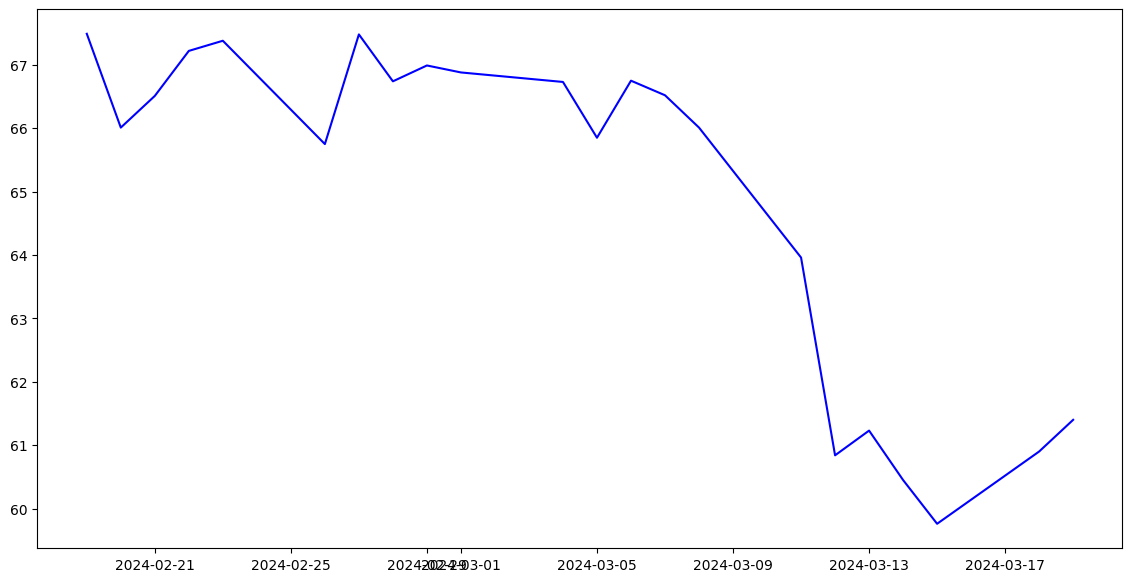

In [8]:
# Plotar os preços de fechamento
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')


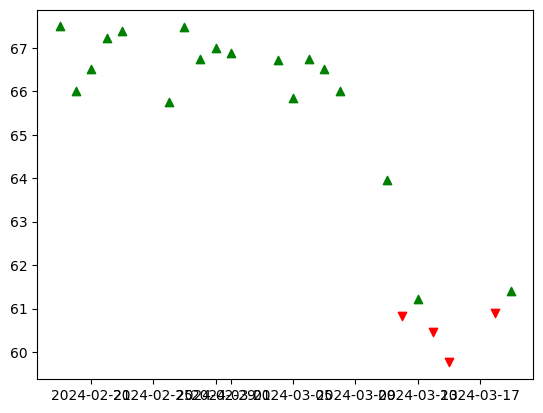

In [9]:
# Adicionar pontos de compra e venda ao gráfico
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal')

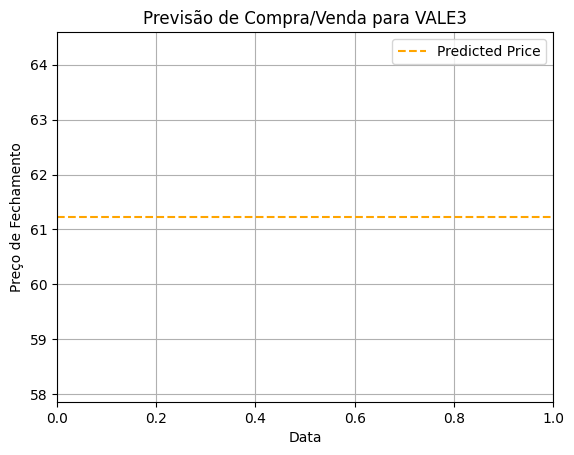

In [10]:
# Adicionar linha de preço previsto
plt.axhline(y=prediction[0], color='orange', linestyle='--', label='Predicted Price')

plt.title('Previsão de Compra/Venda para VALE3')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()